# Importing Libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
sns.set_theme(style="white")

# EDA

In [10]:
df = pd.read_csv('./winemag-data_first150k.csv', index_col='Unnamed: 0')
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137235 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   country      137230 non-null  category
 1   description  137235 non-null  object  
 2   designation  137235 non-null  object  
 3   points       137235 non-null  int64   
 4   price        137235 non-null  float64 
 5   province     137235 non-null  object  
 6   region_1     137235 non-null  object  
 7   region_2     137235 non-null  object  
 8   variety      137235 non-null  object  
 9   winery       137235 non-null  object  
dtypes: category(1), float64(1), int64(1), object(7)
memory usage: 10.6+ MB


In [11]:
# drop unknown price
df.dropna(subset=["price"], inplace=True)

# fill the missing value with blank
df.fillna("", inplace=True)
df["country"] = df["country"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137235 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   country      137235 non-null  category
 1   description  137235 non-null  object  
 2   designation  137235 non-null  object  
 3   points       137235 non-null  int64   
 4   price        137235 non-null  float64 
 5   province     137235 non-null  object  
 6   region_1     137235 non-null  object  
 7   region_2     137235 non-null  object  
 8   variety      137235 non-null  object  
 9   winery       137235 non-null  object  
dtypes: category(1), float64(1), int64(1), object(7)
memory usage: 10.6+ MB


In [33]:
df.describe()

,points,price
count,137235.000000,137235.000000
mean,87.787919,33.131482
std,3.221680,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


## What country produce most wines?

### Creating Pareto Plot

In [12]:
# Prepare data for pareto plot
count_df = pd.DataFrame(df[["country"]].value_counts())
count_df.rename(columns={0:"count"}, inplace=True)

# Add column to show cumulative percentage
count_df["cumprec"] = count_df["count"].cumsum()/count_df["count"].sum()*100
count_df.reset_index(inplace=True)
count_df

,country,count,cumprec
0,US,62139,45.279265
1,Italy,18784,58.966736
2,France,14785,69.740227
3,Spain,8160,75.686232
4,Chile,5766,79.887784
5,Argentina,5587,83.958903
6,Australia,4894,87.525048
7,Portugal,4176,90.568004
8,New Zealand,3070,92.805042
9,Austria,2483,94.614348


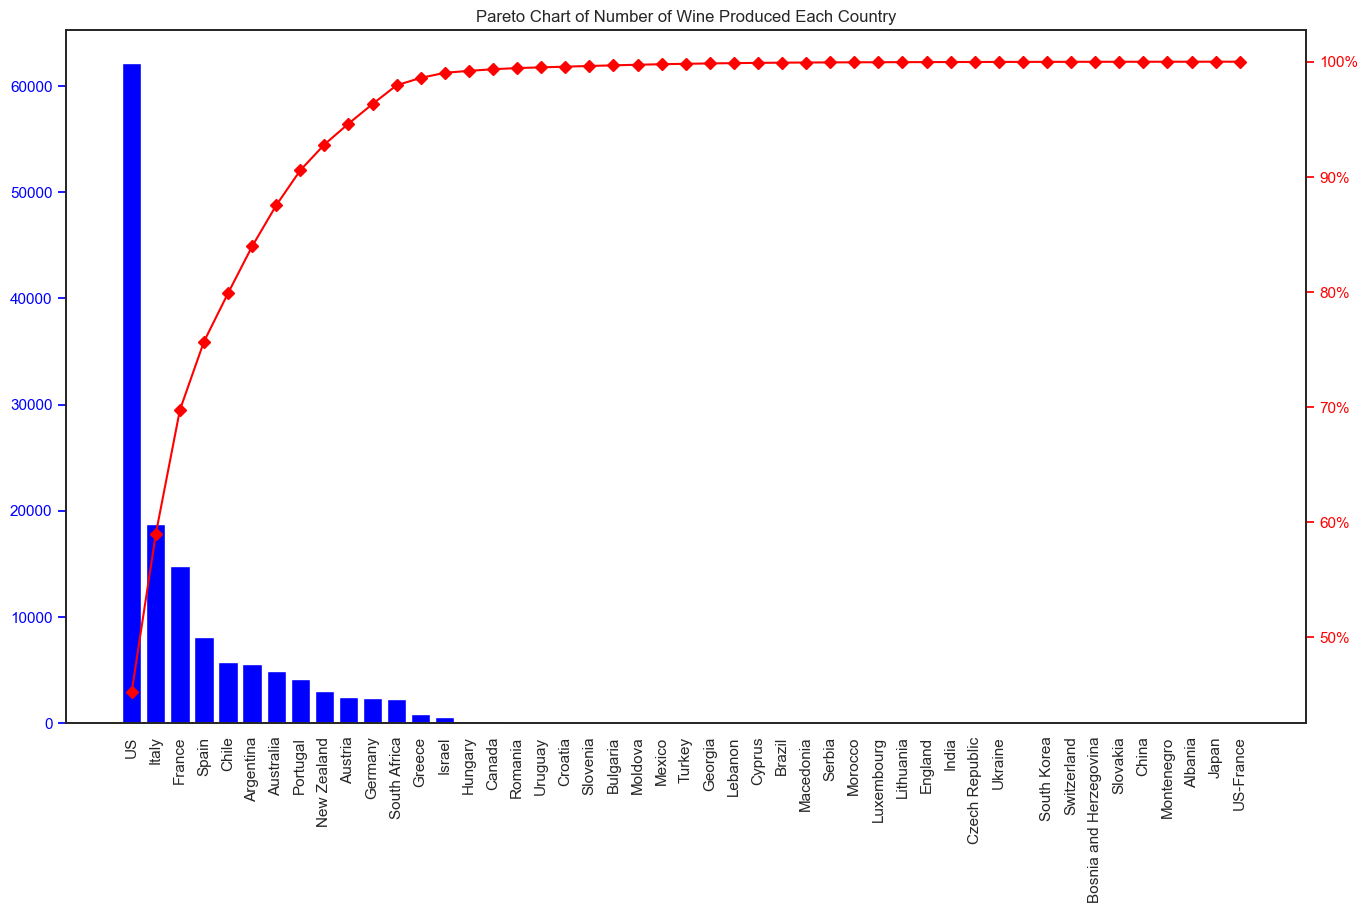

As show in the chart, around 80% of number of wine were produced from US, Italy, France, Chile and Argentina.


In [13]:
# Define color
color_bar = 'blue'
color_line = 'red'

# Create bar plot
fig, ax= plt.subplots(figsize=(16,9))
ax.bar(count_df["country"], count_df["count"], color = color_bar)

# Add line plot 
ax2 = ax.twinx()
ax2.plot(count_df["country"], count_df["cumprec"], color=color_line, marker="D")
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color_bar)
ax2.tick_params(axis='y', colors=color_line)

# Rotating X-axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.title("Pareto Chart of Number of Wine Produced Each Country")
plt.show()

print("As show in the chart, around 80% of number of wine were produced from US, Italy, France, Chile and Argentina.")

### Is the price relevant to points?

As shown here the price to point relationsship is more likely to have exponential relationship


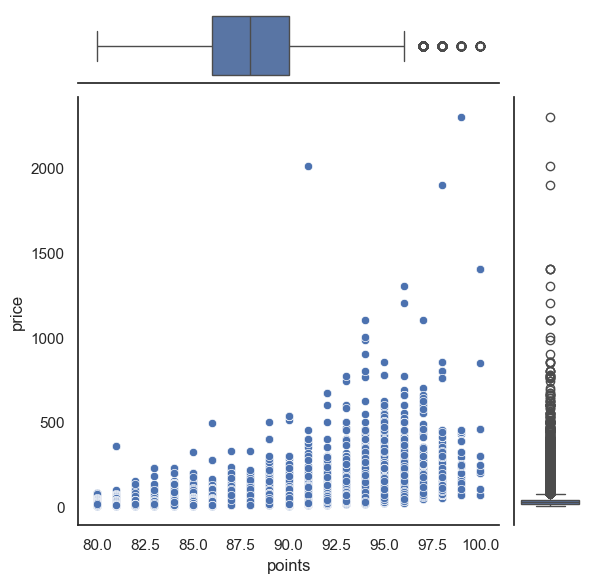

In [14]:
# fig2, ax2 = plt.subplots(ncols=2)
g = sns.JointGrid(data=df, y = "price", x ="points")
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.boxplot)


print("As shown here the price to point relationsship is more likely to have exponential relationship")

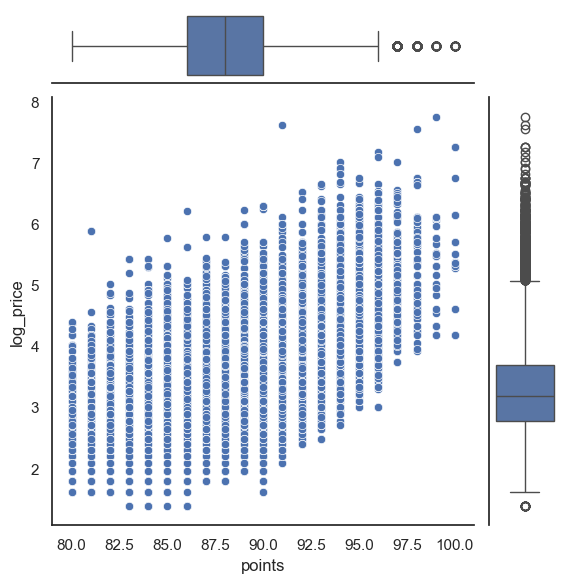

In [15]:
df["log_price"] = np.log(df["price"])


g2 = sns.JointGrid(data=df, y = "log_price", x ="points")
g2.plot_joint(sns.scatterplot)
g2.plot_marginals(sns.boxplot)


# Generate NLP Predictor

In [16]:
# Get stop words 

import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
# print(stopwords.words('english'))
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/narawishing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Extracting description column to remove stopwords

def process_text(text):

    # Remove Symbols
    text = "".join(w for w in text if w not in ("?", ".", ";", ":", "!", '"', ",","-","_"))
    
    # convert the text into tokenizer
    word_tokens = word_tokenize(text)

    # Remove stop words in text
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    return " ".join([word for word in filtered_sentence])

example = """This is a sample sentence,
                  showing off the stop words filtration."""

processed_example = process_text(example)
print(processed_example)


sample sentence showing stop words filtration


In [18]:
# apply the method to the dataframe
df["text_tokens"] = df["description"].apply(process_text)
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery,log_price,text_tokens
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,5.459586,tremendous 100 % varietal wine hails Oakville ...
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,,Tinta de Toro,Bodega Carmen Rodríguez,4.700480,Ripe aromas fig blackberry cassis softened swe...
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,4.499810,Mac Watson honors memory wine made mother trem...
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,4.174387,spent 20 months 30 % new French oak incorporat...
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,,Provence red blend,Domaine de la Bégude,4.189655,top wine La Bégude named highest point vineyar...
...,...,...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,,91,20.0,Southern Italy,Fiano di Avellino,,White Blend,Feudi di San Gregorio,2.995732,Many people feel Fiano represents southern Ita...
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,,Champagne Blend,H.Germain,3.295837,Offers intriguing nose ginger lime floral elem...
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,,White Blend,Terredora,2.995732,classic example comes cru vineyard called Terr...
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,,Champagne Blend,Gosset,3.951244,perfect salmon shade scents peaches cherries t...


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137235 entries, 0 to 150929
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   country      137235 non-null  category
 1   description  137235 non-null  object  
 2   designation  137235 non-null  object  
 3   points       137235 non-null  int64   
 4   price        137235 non-null  float64 
 5   province     137235 non-null  object  
 6   region_1     137235 non-null  object  
 7   region_2     137235 non-null  object  
 8   variety      137235 non-null  object  
 9   winery       137235 non-null  object  
 10  log_price    137235 non-null  float64 
 11  text_tokens  137235 non-null  object  
dtypes: category(1), float64(2), int64(1), object(8)
memory usage: 12.7+ MB


## Predictor 1: Predict the points of wine using only description

In [19]:
from sklearn.model_selection import train_test_split

# Selecting the feature and target
X = df[["text_tokens"]]
y = df["points"]

# Split the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [20]:
# Word Vecotrization
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(analyzer=lambda x: x.split(' '))
vector.fit_transform(X_train["text_tokens"])
vector.vocabulary_

{'Waxy': 15691,
 'warm': 40728,
 'peach': 32113,
 'sweet': 38036,
 'ham': 26310,
 'spice': 36731,
 'vanilla': 40208,
 'aromas': 17187,
 'Catena': 3696,
 'Alta': 1603,
 'goes': 25790,
 'stellar': 37139,
 'fact': 23960,
 "'s": 47,
 'light': 28626,
 'fruit': 25155,
 'lacks': 28158,
 'depth': 22211,
 'flavor': 24507,
 'punch': 33529,
 "'d": 41,
 'hope': 26984,
 'see': 35463,
 '$': 1,
 '34': 863,
 'wine': 41192,
 'get': 25634,
 'fleshy': 24615,
 'soft': 36434,
 'Chard': 3877,
 'mild': 29768,
 'papaya': 31956,
 'melon': 29576,
 'flavors': 24519,
 'whack': 41034,
 'finishing': 24339,
 'oak': 31040,
 'Dense': 5071,
 'chewy': 19917,
 'highly': 26800,
 'nuanced': 30972,
 'example': 23702,
 'offers': 31228,
 'enticing': 23436,
 'combination': 20678,
 'animal': 16904,
 'notes': 30849,
 '(': 52,
 'sweaty': 38025,
 'saddle': 35033,
 'leather': 28386,
 ')': 53,
 'vibrant': 40442,
 'raspberry': 33864,
 'cherry': 19815,
 'abundant': 16159,
 'tannins': 38349,
 'ambitious': 16821,
 'level': 28568,
 'bene

In [21]:
# Generating bag of words (BoW)

train_bow = vector.transform(X_train["text_tokens"])
pd.DataFrame(train_bow.toarray(), columns=vector.get_feature_names_out(), index=X_train["text_tokens"])

,#,$,%,&,','','01,'01s,'02,'02s,...,—soy,—this,—without,—woodaged,—yet,‘,’,“,”,…
text_tokens,,,,,,,,,,,,,,,,,,,,,
Waxy warm peach sweet ham spice vanilla aromas Catena Alta goes stellar fact 's light fruit lacks depth flavor punch 'd hope see $ 34 wine get fleshy soft Chard mild peach papaya melon flavors whack finishing oak,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dense chewy highly nuanced example offers enticing combination animal notes ( sweaty saddle leather ) vibrant fruit ( raspberry cherry ) abundant tannins ambitious level oak benefit five 10 years aging,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dark moody bouquet loaded heady black fruit coffee smoky leather cigar box aromas Unfortunately soft mouth offers far less intensity fading notes cherry plum skins Drink,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nearly 100 % Cabernet strongly flavored bone dry tannic nowhere near ready tough astringent mouthfeel concentrated richness grapes grown lowyielding hillsides Intense flavors blackberries black cherries cassis cola herbs mark fine ageable wine n't touch 2013 ride many years beyond,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Heavy dull candied flavors cherries cola currants chocolate Gets job done,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
briary redberry plum aromas earthy rubbery medium body bit heavy justadequate acidity solid flavors plum berry resiny oak finish oaky medicinal tasting,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Modern enticing aromas red berry fruit vanilla chocolate dried tobacco leaves emerge beautifully made Amarone Oak shadings come palate soft supple tannins,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hot harsh peppery mouth simple blackberry cherry jam flavors wine okay drinking backyard barbecues tumbler,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Generate model using regression models

# from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_bow, y_train)

LinearRegression()

In [30]:
from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error, mean_absolute_error, mean_squared_error

def print_metrics(y_pred,y_test):
    mape = mean_absolute_percentage_error(y_pred=y_pred, y_true=y_test)
    mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
    rmse = root_mean_squared_error(y_pred=y_pred, y_true=y_test)
    mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
    print(f"""
          The metric of predictor are 
          - MAE\t\t: {mae}\n
          - MAPE\t: {mape}\n 
          - MSE\t\t: {mse}\n
          - RMSE\t: {rmse}""")

In [ ]:
test_bow = vector.transform(X_test["text_tokens"])
y_pred = model.predict(test_bow)
print_metrics(y_pred,y_test)


          The metric of predictor are 
          - MAE		: 1.308553281265703

          - MAPE	: 0.014869221516816647
 
          - MSE		: 3.7569467468709026

          - RMSE	: 1.9382844855363472


As we can see from the metrics, this predictor has a high predictive performance showing that the error of predicting is only approximately 1.48%

In [38]:
# Check the weights and intercept
print(f"Model intercept is {model.intercept_}")
coeff = pd.DataFrame(model.coef_, index=vector.get_feature_names_out() ,columns=["Coefficient"])
coeff.sort_values(by="Coefficient", ascending=False)

Model intercept is 83.79950324683244


,Coefficient
Creator,17.755696
Randy,15.005578
acidity—beautiful,14.992981
Roberts,14.873526
Père,13.700747
...,...
flea,-12.520503
1990,-13.012651
latetodevelop,-13.017705
amphitheater,-14.836792
